In [1]:
import functools
import operator
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
import matplotlib.ticker as mtick
import pathlib
import math
import mmap
import re
import os
import itertools
from pathlib import Path

In [2]:
def calc_mpi_time(f, keys):
    with open(f, 'r') as f:
        #m = mmap.mmap(f.fileno(), 0, prot=mmap.PROT_READ) # size 0 means whole file
        m = mmap.mmap(f.fileno(), 0, access=mmap.ACCESS_READ) # size 0 means whole file
        e = 0.0
        t = 1.0
        p = 0.0
        while True:
            line = m.readline()
            text = line.strip()
            if bytes(keys[0], encoding='utf8') in text:
                e = split_tokenize(str(text), keys[0], 0) # estimate
                #print(e)
            if bytes(keys[1], encoding='utf8') in text:
                t = split_tokenize(str(text), keys[1], 1) # iterations
                #print(t)
            #if bytes(keys[2], encoding='utf8') in text:
                #p = split_tokenize(str(text), keys[2], 0) # ranks
            if not line: 
                break
        m.close()
        if p == 0.0 or p is None:
            if re.search('lulesh', str(f), re.IGNORECASE):
                p = 1000.0
            elif re.search('sweep3d', str(f), re.IGNORECASE):
                p = 1024.0 
            else:
                p = 1024.0
        #print(e)
        #print(t)
        #print(p)
        return ((e * p) / t)


In [3]:
def title_builder(f):
    s = ''
    # application
    if re.search('lulesh', f, re.IGNORECASE):
        s = 'LULESH ('
    if re.search('sweep3d', f, re.IGNORECASE):
        s = 'SWEEP3D ('
    if re.search('minivite', f, re.IGNORECASE):
        s = 'Graph Clustering ('
    if re.search('tric', f, re.IGNORECASE):
        s = 'Graph Triangle Counting ('
    if re.search('BFS', f, re.IGNORECASE):
        s = 'Graph BFS ('
    # network
    if re.search('fat_tree', f, re.IGNORECASE):
        s += 'Fat tree vs. Jellyfish)' 
    if re.search('dragonfly', f, re.IGNORECASE):
        s += 'Dragonfly vs. Jellyfish)' 
    return s

In [4]:
def file_name(f):
    return os.path.basename(f).rsplit(".", 1)[0]

In [5]:
def get_input(t):
    if re.search('rrg_256', t, re.IGNORECASE):
        return t[0:re.search('rrg_256', t, re.IGNORECASE).end()-len('rrg_256')-1].upper()
    if re.search('dfly_256', t, re.IGNORECASE):
        return t[0:re.search('dfly_256', t, re.IGNORECASE).end()-len('dfly_256')-1].upper()
    if re.search('rrg_512', t, re.IGNORECASE):
        return t[0:re.search('rrg_512', t, re.IGNORECASE).end()-len('rrg_512')-1].upper()
    if re.search('dfly_512', t, re.IGNORECASE):
        return t[0:re.search('dfly_512', t, re.IGNORECASE).end()-len('dfly_512')-1].upper()
    if re.search('rrg_1024', t, re.IGNORECASE):
        return t[0:re.search('rrg_1024', t, re.IGNORECASE).end()-len('rrg_1024')-1].upper()
    if re.search('dfly_1024', t, re.IGNORECASE):
        return t[0:re.search('dfly_1024', t, re.IGNORECASE).end()-len('dfly_1024')-1].upper()    
    if re.search('rrg', t, re.IGNORECASE):
        return t[0:re.search('rrg', t, re.IGNORECASE).end()-len('rrg')-1].upper()
    if re.search('dfly', t, re.IGNORECASE):
        return t[0:re.search('dfly', t, re.IGNORECASE).end()-len('dfly')-1].upper()
    if re.search('fat_tree', t, re.IGNORECASE):
        return t[0:re.search('fat_tree', t, re.IGNORECASE).end()-len('fat_tree')-1].upper()
    return t

In [6]:
def factors(number):
    x = int(math.sqrt(number))
    print(x)
    while(number % x):
        x += 1
    return [int(number/x), x]

In [7]:
def title_extract(f):
    t = os.path.basename(f)
    t = t.rsplit(".", 1)[0]
    if re.search('rrg', t, re.IGNORECASE):
        return t[re.search('rrg', t, re.IGNORECASE).start():].upper()
    if re.search('dfly', t, re.IGNORECASE):
        return t[re.search('dfly', t, re.IGNORECASE).start():].upper()
    if re.search('fat_tree', t, re.IGNORECASE):
        return t[re.search('fat_tree', t, re.IGNORECASE).start():].upper()
    return t

In [8]:
def app_extract(f):
    return os.sep.join(os.path.normpath(f).split(os.sep)[-2:])
    #t = os.path.basename(f)
    #return t.split('_', 1)[0]

In [9]:
def flatten(L):
    islist = map(lambda x: isinstance(x, list), L)
    if (all(islist)):
        L1 = functools.reduce(operator.concat, L) 
        return flatten(L1)
    else:
        return L

In [10]:
def split_tokenize(ls, key, idx = 0):
    if ls.find(key) != -1:
        key = ls
        return float(re.findall("\d+\.\d+|[\d]+", key)[idx])
    return None

In [11]:
def get_num_str(s):
    l = [int(n) for n in s.split() if n.isdigit()]
    return l[-1] if l else None

lulesh_rrg_153_24_87_min
lulesh_rrg_153_24_87_am
lulesh_rrg_153_24_87_um
lulesh_dfly_17_9_min
lulesh_dfly_17_9_par
lulesh_dfly_17_9_ugal
lulesh_dfly_17_9_val
sweep3d_rrg_153_24_87_min
sweep3d_rrg_153_24_87_am
sweep3d_rrg_153_24_87_um
sweep3d_dfly_17_9_min
sweep3d_dfly_17_9_par
sweep3d_dfly_17_9_ugal
sweep3d_dfly_17_9_val
graph500-scale25-ef16_adj_rrg_153_24_87_min
graph500-scale25-ef16_adj_rrg_153_24_87_am
graph500-scale25-ef16_adj_rrg_153_24_87_um
graph500-scale24-ef16_adj_rrg_153_24_87_min
graph500-scale24-ef16_adj_rrg_153_24_87_am
graph500-scale24-ef16_adj_rrg_153_24_87_um
graph500-scale23-ef16_adj_rrg_153_24_87_min
graph500-scale23-ef16_adj_rrg_153_24_87_am
graph500-scale23-ef16_adj_rrg_153_24_87_um
graph500-scale25-ef16_adj_dfly_17_9_min
graph500-scale25-ef16_adj_dfly_17_9_par
graph500-scale25-ef16_adj_dfly_17_9_ugal
graph500-scale25-ef16_adj_dfly_17_9_val
graph500-scale24-ef16_adj_dfly_17_9_min
graph500-scale24-ef16_adj_dfly_17_9_par
graph500-scale24-ef16_adj_dfly_17_9_ugal
graph

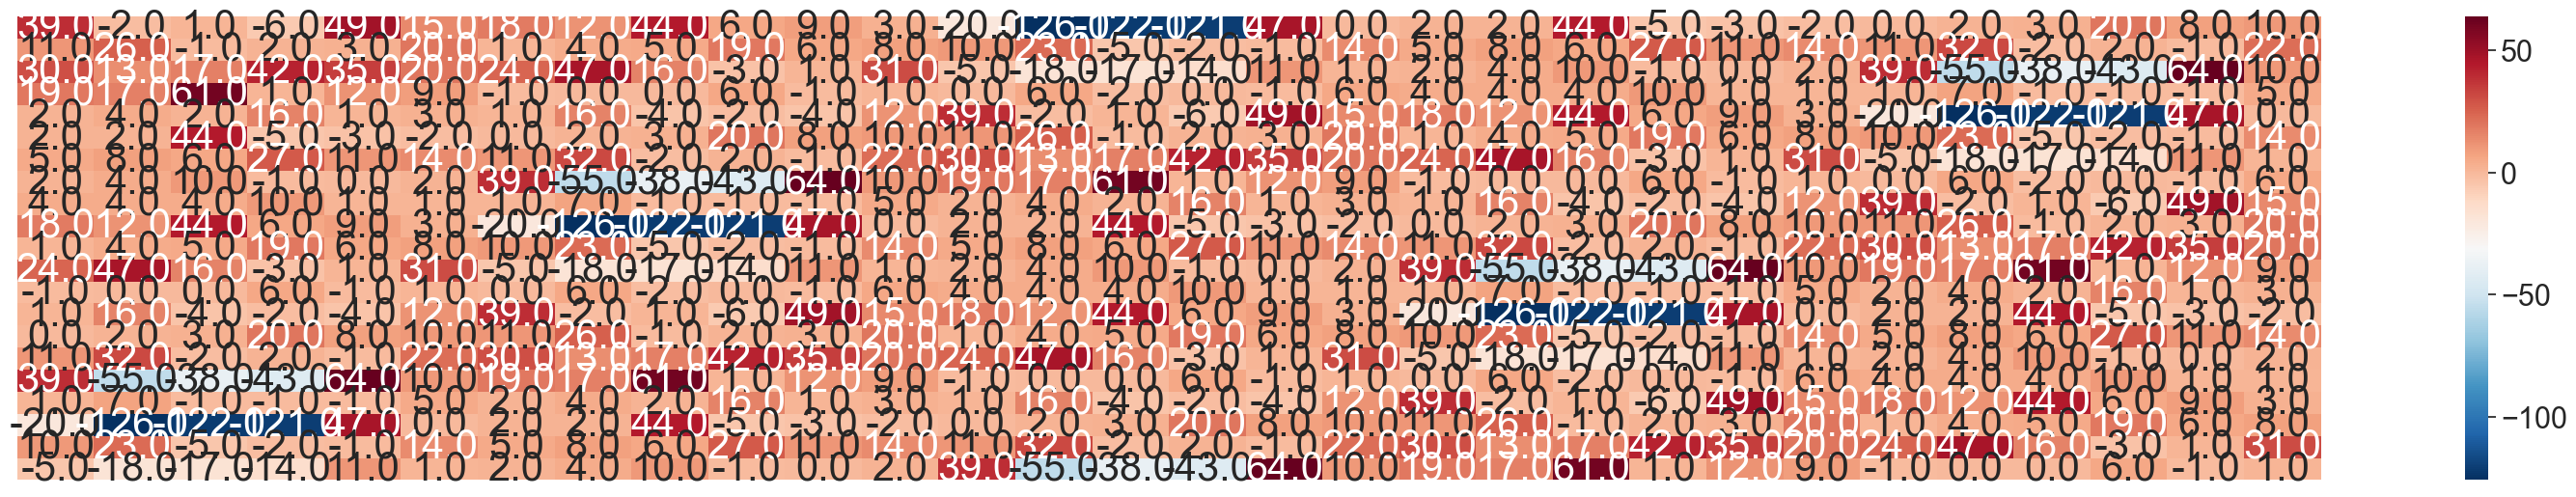

In [73]:
    dirpath='C:\\Users\\mdnah\\OneDrive\\Desktop\\heat_map\\Interconnect_Data\\'
    #dirpath = 'C:\\Users\mdnahidnewaz\\Desktop\\Data Excel\\Interconnect_Data\\'
    #dirpath = '..\\Interconnect_Data\\'
    #paths = ('routing_data_lulesh_dragonfly_and_Jellyfish/', 'routing_data_lulesh_fat_tree_and_Jellyfish/', 'routing_data_sweep3d_dragonfly_and_Jellyfish/', 'routing_data_sweep3d_fat_tree_and_Jellyfish/', 'routing_data_Graph500_BFS_fat_tree_and_Jellyfish/', 'routing_data_minivite_fat_tree_and_Jellyfish/', 'routing_data_Graph500_BFS_Dragonfly_and_Jellyfish/', 'routing_data_tric_dragonfly_and_Jellyfish/', 'routing_data_tric_fat_tree_and_Jellyfish/', 'routing_data_minivite_dragonfly_and_Jellyfish/')
    #inputs = ('orkut_', 'uk-2002_', 'stokes_', 'kron_g500-logn16_', 'kron_g500-logn17_', 'kron_g500-logn18_', 'graph500-scale16-ef16_', 'graph500-scale17-ef16_', 'graph500-scale18-ef16_', 'graph500-scale19-ef16_', 'graph500-scale25-ef16_', 'graph500-scale24-ef16_', 'graph500-scale23-ef16_', 'lulesh_', 'sweep3d_')
    #inputs = ('orkut_', 'uk-2002_', 'stokes_', 'kron_g500-logn16_', 'kron_g500-logn17_', 'kron_g500-logn18_', 'graph500-scale16-ef16_', 'graph500-scale17-ef16_', 'graph500-scale18-ef16_', 'graph500-scale19-ef16_', 'graph500-scale25-ef16_', 'graph500-scale24-ef16_', 'graph500-scale23-ef16_', 'rgg_n_2_22_s0_', 'rgg_n_2_23_s0_', 'rgg_n_2_24_s0_')
    topos = ('rrg_153_24_87_', 'dfly_17_9_', 'rrg_120_38_446_', 'fat_tree_3_48_2')
    #rt_algs = ('am', 'par')
    
    path1 = ('routing_data_lulesh_dragonfly_and_Jellyfish\\','routing_data_sweep3d_dragonfly_and_Jellyfish\\','routing_data_Graph500_BFS_Dragonfly_and_Jellyfish\\', 'routing_data_minivite_dragonfly_and_Jellyfish\\','routing_data_tric_dragonfly_and_Jellyfish\\' )
    #folders = ('', 'Graph500_BFS\\', 'Tric\\', 'minivite\\')
    path2 = ('routing_data_lulesh_fat_tree_and_Jellyfish\\','routing_data_sweep3d_fat_tree_and_Jellyfish\\', 'routing_data_Graph500_BFS_fat_tree_and_Jellyfish\\', 'routing_data_minivite_fat_tree_and_Jellyfish\\','routing_data_tric_fat_tree_and_Jellyfish\\' )
    
    #paths = ('routing_data_lulesh_dragonfly_and_Jellyfish/', 'routing_data_lulesh_fat_tree_and_Jellyfish/', 'routing_data_sweep3d_dragonfly_and_Jellyfish/', 'routing_data_sweep3d_fat_tree_and_Jellyfish/', 'routing_data_Graph500_BFS_fat_tree_and_Jellyfish/', 'routing_data_minivite_fat_tree_and_Jellyfish/', 'routing_data_Graph500_BFS_Dragonfly_and_Jellyfish/', 'routing_data_tric_dragonfly_and_Jellyfish/', 'routing_data_tric_fat_tree_and_Jellyfish/', 'routing_data_minivite_dragonfly_and_Jellyfish/', 'routing_weak_scaling/Graph500_BFS/', 'routing_weak_scaling/Tric/', 'routing_weak_scaling/minivite/', 'routing_strong_scaling/Graph500_BFS/', 'routing_strong_scaling/Tric/', 'routing_strong_scaling/minivite/' )
    inputs = ('lulesh_', 'sweep3d_', 'orkut_', 'uk-2002_', 'stokes_', 'kron_g500-logn16_', 'kron_g500-logn17_', 'kron_g500-logn18_', 'graph500-scale16-ef16_', 'graph500-scale17-ef16_', 'graph500-scale18-ef16_', 'graph500-scale19-ef16_', 'graph500-scale25-ef16_adj_', 'graph500-scale24-ef16_adj_', 'graph500-scale23-ef16_adj_', 'rgg_n_2_22_s0_', 'rgg_n_2_23_s0_', 'rgg_n_2_24_s0_')
    keys = ('Estimated total runtime of', 'Modularity, #Iterations', '#Processes')
    #folders = ('', 'Graph500_BFS/', 'Tric/', 'minivite/')
    #topos = ('rrg_256_65_16_60_', 'rrg_512_91_18_61_', 'rrg_1024_153_24_87_', 'dfly_256_13_5_4_', 'dfly_512_13_7_6_', 'dfly_1024_17_9_8_', 'rrg_153_24_87_', 'dfly_17_9_', 'rrg_120_38_446_', 'fat_tree_3_48_2')
    rt_alg1 = ('min','am', 'um')
    rt_alg2 = ('min', 'par', 'ugal', 'val')
    lg = []

    l2 = []
    l3 = []
    for path in path2:
        for topo in topos:
            if topo == "fat_tree_3_48_2":
                for inp in inputs:
                    key = dirpath + path + inp + topo + ".out"
                    if Path(key).exists():
                        #print(key)
                        l2.append(key)
            if topo == "rrg_120_38_446_":
                for inp in inputs:
                    for rt in rt_alg1:
                        key = dirpath + path + inp + topo + rt + ".out"
                        if Path(key).exists():
                            #print(key)
                            l2.append(key)
    for path in path1:
        for topo in topos:
            if topo == "dfly_17_9_":
                for inp in inputs:
                    for rt in rt_alg2:
                        key = dirpath + path + inp + topo + rt + ".out"
                        if Path(key).exists():
                            #print(key)
                            l3.append(key)
            if topo == "rrg_153_24_87_":
                for inp in inputs:
                    for rt in rt_alg1:
                        key = dirpath + path + inp + topo + rt + ".out"
                        #print(key)
                        #print(Path(key).exists())
                        if Path(key).exists():
                            #print(key)
                            l3.append(key)                 
                        
        if l2 != [] and l3 != []:
            #lg.append(l2)
            lg.append(l3)
            
    
    #print (len(l2))
    #print(len(l3))
    #print(len(lg))
    #print(lg)
    
    rl = []
    rll = []
    ll = []

    # only include cases >= 5% improvement
    for l in lg:
        #if rl != []:
        #    rll.append(rl)
        #    rl = []
        for i in range(0,len(l)):
            it = file_name(l[i])
            print(it)
            it_inp = get_input(it)
            if re.search('rrg_256', it, re.IGNORECASE) or re.search('rrg_512', it, re.IGNORECASE) or re.search('rrg_1024', it, re.IGNORECASE) or re.search('rrg', it, re.IGNORECASE):
                x = calc_mpi_time(l[i], keys)
                #print("...........")
                #print(x)
                for j in range(i+1, len(l)):
                    jt = file_name(l[j])
                    if re.search('dfly', jt, re.IGNORECASE) or re.search('fat_tree', jt, re.IGNORECASE):
                        jt_inp = get_input(jt)
                        if it_inp == jt_inp:
                            y = calc_mpi_time(l[j], keys)
                            #print(y)
                            #pdiff = int(round(100*(abs(y-x)/y),2))
                            pdiff = (round(100*((y-x)/y),0))
                            
                            #pdiff = (round(100*((x-x)/y),0))
                            if pdiff==0:
                                pdiff=0
                            #print(pdiff)
                            #if pdiff >= 5:
                            rll.append(pdiff)

    tot = len(rll)
    #print(tot)
    nrows,ncols = factors(tot) 

    for i in range(nrows):
        if rl != []:
            ll.append(rl)
            rl = []
        for j in range(ncols):
            rl.append(rll[i*ncols+j])
    
    df = pd.DataFrame(ll)

    #print(rll)

    sns.set_theme()
    sns.set(font_scale=2)

    #apps = ["Sweep3D", "LULESH", "BFS", "Clustering", "Triangle"]
    #apps = ["BFS", "Clustering", "Triangle"]
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30, 5))
    xtics = list(df.columns)

    ax = sns.heatmap(data=df, xticklabels=[], yticklabels=[], cmap='RdBu_r', fmt='', annot=True, annot_kws={"size":30})

    #ax.set(xlabel="", ylabel="MPI times (s)")
    #ax.set_yscale("log")
    plt.xticks(rotation=30, fontsize=20, ha='right')
    #plt.xticks(fontsize=16)
    
    fig.tight_layout(pad=0.0, h_pad=0.0, w_pad=0.0)
    print("rrg-perf-heatmap.pdf saving...")
    fig.savefig('rrg-perf-heatmap.pdf', bbox_inches='tight')

In [72]:
print(rll)
fat_results1 = rll[0:33]
fat_results1

[3.0, 23.0, 21.0, -33.0, 29.0, 22.0, 18.0, 20.0, 10.0, 20.0, 19.0, 10.0, 18.0, 21.0, 9.0, 35.0, 36.0, 13.0, 9.0, 12.0, 8.0, -16.0, 33.0, 32.0, 4.0, 3.0, 2.0, 3.0, 1.0, -1.0, 6.0, 4.0, -1.0, 3.0, 23.0, 21.0, -33.0, 29.0, 22.0, 18.0, 20.0, 10.0, 20.0, 19.0, 10.0, 18.0, 21.0, 9.0, 35.0, 36.0, 13.0, 9.0, 12.0, 8.0, -16.0, 33.0, 32.0, 4.0, 3.0, 2.0, 3.0, 1.0, -1.0, 6.0, 4.0, -1.0, 3.0, 23.0, 21.0, -33.0, 29.0, 22.0, 18.0, 20.0, 10.0, 20.0, 19.0, 10.0, 18.0, 21.0, 9.0, 35.0, 36.0, 13.0, 9.0, 12.0, 8.0, -16.0, 33.0, 32.0, 4.0, 3.0, 2.0, 3.0, 1.0, -1.0, 6.0, 4.0, -1.0, 3.0, 23.0, 21.0, -33.0, 29.0, 22.0, 18.0, 20.0, 10.0, 20.0, 19.0, 10.0, 18.0, 21.0, 9.0, 35.0, 36.0, 13.0, 9.0, 12.0, 8.0, -16.0, 33.0, 32.0, 4.0, 3.0, 2.0, 3.0, 1.0, -1.0, 6.0, 4.0, -1.0, 3.0, 23.0, 21.0, -33.0, 29.0, 22.0, 18.0, 20.0, 10.0, 20.0, 19.0, 10.0, 18.0, 21.0, 9.0, 35.0, 36.0, 13.0, 9.0, 12.0, 8.0, -16.0, 33.0, 32.0, 4.0, 3.0, 2.0, 3.0, 1.0, -1.0, 6.0, 4.0, -1.0]


[3.0,
 23.0,
 21.0,
 -33.0,
 29.0,
 22.0,
 18.0,
 20.0,
 10.0,
 20.0,
 19.0,
 10.0,
 18.0,
 21.0,
 9.0,
 35.0,
 36.0,
 13.0,
 9.0,
 12.0,
 8.0,
 -16.0,
 33.0,
 32.0,
 4.0,
 3.0,
 2.0,
 3.0,
 1.0,
 -1.0,
 6.0,
 4.0,
 -1.0]

In [74]:
fat_results2 = rll[0:132]
fat_results2

[39.0,
 -2.0,
 1.0,
 -6.0,
 49.0,
 15.0,
 18.0,
 12.0,
 44.0,
 6.0,
 9.0,
 3.0,
 -20.0,
 -126.0,
 -122.0,
 -121.0,
 47.0,
 0,
 2.0,
 2.0,
 44.0,
 -5.0,
 -3.0,
 -2.0,
 0,
 2.0,
 3.0,
 20.0,
 8.0,
 10.0,
 11.0,
 26.0,
 -1.0,
 2.0,
 3.0,
 20.0,
 1.0,
 4.0,
 5.0,
 19.0,
 6.0,
 8.0,
 10.0,
 23.0,
 -5.0,
 -2.0,
 -1.0,
 14.0,
 5.0,
 8.0,
 6.0,
 27.0,
 11.0,
 14.0,
 11.0,
 32.0,
 -2.0,
 2.0,
 -1.0,
 22.0,
 30.0,
 13.0,
 17.0,
 42.0,
 35.0,
 20.0,
 24.0,
 47.0,
 16.0,
 -3.0,
 1.0,
 31.0,
 -5.0,
 -18.0,
 -17.0,
 -14.0,
 11.0,
 1.0,
 2.0,
 4.0,
 10.0,
 -1.0,
 0,
 2.0,
 39.0,
 -55.0,
 -38.0,
 -43.0,
 64.0,
 10.0,
 19.0,
 17.0,
 61.0,
 1.0,
 12.0,
 9.0,
 -1.0,
 0,
 0,
 6.0,
 -1.0,
 1.0,
 0,
 6.0,
 -2.0,
 0,
 -1.0,
 6.0,
 4.0,
 4.0,
 4.0,
 10.0,
 1.0,
 1.0,
 1.0,
 7.0,
 -1.0,
 -1.0,
 -1.0,
 5.0,
 2.0,
 4.0,
 2.0,
 16.0,
 1.0,
 3.0,
 1.0,
 16.0,
 -4.0,
 -2.0,
 -4.0,
 12.0]

In [75]:
fat_results = []

l1=0
l2=0
for x in range(0,11):
    for l in range(0,3):
        if l1<=len(fat_results1):
            fat_results.append(fat_results1[l1])
            print(fat_results)
            l1=l1+1
    for k in range(0,12):
        if l2<=len(fat_results2):
            fat_results.append(fat_results2[l2])
            print(fat_results)
            l2=l2+1
fat_results

[3.0]
[3.0, 23.0]
[3.0, 23.0, 21.0]
[3.0, 23.0, 21.0, 39.0]
[3.0, 23.0, 21.0, 39.0, -2.0]
[3.0, 23.0, 21.0, 39.0, -2.0, 1.0]
[3.0, 23.0, 21.0, 39.0, -2.0, 1.0, -6.0]
[3.0, 23.0, 21.0, 39.0, -2.0, 1.0, -6.0, 49.0]
[3.0, 23.0, 21.0, 39.0, -2.0, 1.0, -6.0, 49.0, 15.0]
[3.0, 23.0, 21.0, 39.0, -2.0, 1.0, -6.0, 49.0, 15.0, 18.0]
[3.0, 23.0, 21.0, 39.0, -2.0, 1.0, -6.0, 49.0, 15.0, 18.0, 12.0]
[3.0, 23.0, 21.0, 39.0, -2.0, 1.0, -6.0, 49.0, 15.0, 18.0, 12.0, 44.0]
[3.0, 23.0, 21.0, 39.0, -2.0, 1.0, -6.0, 49.0, 15.0, 18.0, 12.0, 44.0, 6.0]
[3.0, 23.0, 21.0, 39.0, -2.0, 1.0, -6.0, 49.0, 15.0, 18.0, 12.0, 44.0, 6.0, 9.0]
[3.0, 23.0, 21.0, 39.0, -2.0, 1.0, -6.0, 49.0, 15.0, 18.0, 12.0, 44.0, 6.0, 9.0, 3.0]
[3.0, 23.0, 21.0, 39.0, -2.0, 1.0, -6.0, 49.0, 15.0, 18.0, 12.0, 44.0, 6.0, 9.0, 3.0, -33.0]
[3.0, 23.0, 21.0, 39.0, -2.0, 1.0, -6.0, 49.0, 15.0, 18.0, 12.0, 44.0, 6.0, 9.0, 3.0, -33.0, 29.0]
[3.0, 23.0, 21.0, 39.0, -2.0, 1.0, -6.0, 49.0, 15.0, 18.0, 12.0, 44.0, 6.0, 9.0, 3.0, -33.0, 29.0, 22.0]

[3.0,
 23.0,
 21.0,
 39.0,
 -2.0,
 1.0,
 -6.0,
 49.0,
 15.0,
 18.0,
 12.0,
 44.0,
 6.0,
 9.0,
 3.0,
 -33.0,
 29.0,
 22.0,
 -20.0,
 -126.0,
 -122.0,
 -121.0,
 47.0,
 0,
 2.0,
 2.0,
 44.0,
 -5.0,
 -3.0,
 -2.0,
 18.0,
 20.0,
 10.0,
 0,
 2.0,
 3.0,
 20.0,
 8.0,
 10.0,
 11.0,
 26.0,
 -1.0,
 2.0,
 3.0,
 20.0,
 20.0,
 19.0,
 10.0,
 1.0,
 4.0,
 5.0,
 19.0,
 6.0,
 8.0,
 10.0,
 23.0,
 -5.0,
 -2.0,
 -1.0,
 14.0,
 18.0,
 21.0,
 9.0,
 5.0,
 8.0,
 6.0,
 27.0,
 11.0,
 14.0,
 11.0,
 32.0,
 -2.0,
 2.0,
 -1.0,
 22.0,
 35.0,
 36.0,
 13.0,
 30.0,
 13.0,
 17.0,
 42.0,
 35.0,
 20.0,
 24.0,
 47.0,
 16.0,
 -3.0,
 1.0,
 31.0,
 9.0,
 12.0,
 8.0,
 -5.0,
 -18.0,
 -17.0,
 -14.0,
 11.0,
 1.0,
 2.0,
 4.0,
 10.0,
 -1.0,
 0,
 2.0,
 -16.0,
 33.0,
 32.0,
 39.0,
 -55.0,
 -38.0,
 -43.0,
 64.0,
 10.0,
 19.0,
 17.0,
 61.0,
 1.0,
 12.0,
 9.0,
 4.0,
 3.0,
 2.0,
 -1.0,
 0,
 0,
 6.0,
 -1.0,
 1.0,
 0,
 6.0,
 -2.0,
 0,
 -1.0,
 6.0,
 3.0,
 1.0,
 -1.0,
 4.0,
 4.0,
 4.0,
 10.0,
 1.0,
 1.0,
 1.0,
 7.0,
 -1.0,
 -1.0,
 -1.0,
 5.0,
 6.0

In [17]:
x= calc_mpi_time('C:\\Users\\mdnah\\OneDrive\\Desktop\\heat_map\\Interconnect_Data\\routing_data_minivite_fat_tree_and_Jellyfish\\orkut_rrg_120_38_446_am.out', keys)
print(x)
print((0.3346*1024)/46)

7.4500400973913035
7.448486956521739


In [76]:
new_list = []
for item in fat_results:
    new_list.append(float(item))
import seaborn as sns # for data visualization
import pandas as pd
routings = ['rrg(min)','rrg(am)','rrg(um)']
#applications = ['lulesh','sweep3d','graph500-scale25','graph500-scale24','graph500-scale23','minivite_orkut','minivite_uk-2002','minivite_stokes','tric_kron_g500-logn16', 'tric_kron_g500-logn17', 'tric_kron_g500-logn18']
df = pd.DataFrame(columns=['routings','applications','improvements'])
applications = ['lulesh','sweep3d','bfs(s25)','bfs(s24)','bfs(s23)','clust.(orkut)','clust.(uk-2002)','clust.(stokes)','tri.(s16)', 'tri.(s17)', 'tri.(s18)']

l = 0
#d = [[None]*2]*11
for i in range(0,len(applications)):
    for j in range(0,len(routings)):
        df.loc[l] = [routings[j], applications[i], new_list[l]]
        #d[i][j].append(new_list[l])
        l=l+1
    
print(df)
#df1 = df.pivot('routings', 'applications', 'improvements') 
df1 = df.pivot_table(index='routings', columns='applications', values='improvements')
#df1 = df1.reset_index().rename_axis(None,1)
#print(df1)
fig, ax = plt.subplots(figsize=(10,5)) 
sns.set(font_scale=1.3)
#annotations = labels.astype(str)
#annotations = df1.improvements.tolist()
#annotations[np.isnan(labels)] = ""
rs = sns.heatmap(df1,annot=True,ax=ax,fmt='g')
#rs = sns.heatmap(df1,annot=d,ax=ax)

rs.set_xticklabels(rs.get_xticklabels(), rotation=75)
#rs.set_xticklabels(rs.get_xmajorticklabels(), fontsize = 14)
#rs.set_yticklabels(rs.get_ymajorticklabels(), fontsize = 14)
fig.savefig('rrg_fat_tree_heatmap.pdf', bbox_inches='tight')

    routings     applications  improvements
0   rrg(min)           lulesh           3.0
1    rrg(am)           lulesh          23.0
2    rrg(um)           lulesh          21.0
3   rrg(min)          sweep3d          39.0
4    rrg(am)          sweep3d          -2.0
5    rrg(um)          sweep3d           1.0
6   rrg(min)         bfs(s25)          -6.0
7    rrg(am)         bfs(s25)          49.0
8    rrg(um)         bfs(s25)          15.0
9   rrg(min)         bfs(s24)          18.0
10   rrg(am)         bfs(s24)          12.0
11   rrg(um)         bfs(s24)          44.0
12  rrg(min)         bfs(s23)           6.0
13   rrg(am)         bfs(s23)           9.0
14   rrg(um)         bfs(s23)           3.0
15  rrg(min)    clust.(orkut)         -33.0
16   rrg(am)    clust.(orkut)          29.0
17   rrg(um)    clust.(orkut)          22.0
18  rrg(min)  clust.(uk-2002)         -20.0
19   rrg(am)  clust.(uk-2002)        -126.0
20   rrg(um)  clust.(uk-2002)        -122.0
21  rrg(min)   clust.(stokes)   

In [77]:
new_list = []
for item in fat_results:
    new_list.append(float(item))
import seaborn as sns # for data visualization
import pandas as pd

routings = ['RRG(min)-FT','RRG(am)-FT','RRG(um)-FT','RRG(min)-DFLY(min)','RRG(min)-DFLY(par)','RRG(min)-DFLY(ugal)','RRG(min)-DFLY(val)','RRG(am)-DFLY(min)','RRG(am)-DFLY(par)','RRG(am)-DFLY(ugal)','RRG(am)-DFLY(val)','RRG(um)-DFLY(min)','RRG(um)-DFLY(par)','RRG(um)-DFLY(ugal)','RRG(um)-DFLY(val)']
#applications = ['lulesh','sweep3d','graph500-scale25','graph500-scale24','graph500-scale23','minivite_orkut','minivite_uk-2002','minivite_stokes','tric_kron_g500-logn16', 'tric_kron_g500-logn17', 'tric_kron_g500-logn18']
df = pd.DataFrame(columns=['routings','applications','improvements'])

applications = ['lulesh','sweep3d','bfs(s25)','bfs(s24)','bfs(s23)','clust.(orkut)','clust.(uk-2002)','clust.(stokes)','tri.(s16)', 'tri.(s17)', 'tri.(s18)']

l = 0
d = []
for i in range(0,len(applications)):
    for j in range(0,len(routings)):
        df.loc[l] = [routings[j], applications[i], new_list[l]]
        d.append(new_list[l])
        l=l+1
    
print(df)
#df1 = df.pivot('routings', 'applications', 'improvements') 
df1 = df.pivot_table(index='routings', columns='applications', values='improvements')
#print(df1)
fig, ax = plt.subplots(figsize=(12,10)) 
sns.set(font_scale=1.3)

rs = sns.heatmap(df1,annot=True,ax=ax,fmt='g' )
rs.set_xticklabels(rs.get_xticklabels(), rotation=75)
#rs.set_xticklabels(rs.get_xmajorticklabels(), fontsize = 14)
#rs.set_yticklabels(rs.get_ymajorticklabels(), fontsize = 14)
fig.savefig('rrg_heatmap.pdf', bbox_inches='tight')


               routings applications  improvements
0           RRG(min)-FT       lulesh           3.0
1            RRG(am)-FT       lulesh          23.0
2            RRG(um)-FT       lulesh          21.0
3    RRG(min)-DFLY(min)       lulesh          39.0
4    RRG(min)-DFLY(par)       lulesh          -2.0
..                  ...          ...           ...
160   RRG(am)-DFLY(val)    tri.(s18)          16.0
161   RRG(um)-DFLY(min)    tri.(s18)          -4.0
162   RRG(um)-DFLY(par)    tri.(s18)          -2.0
163  RRG(um)-DFLY(ugal)    tri.(s18)          -4.0
164   RRG(um)-DFLY(val)    tri.(s18)          12.0

[165 rows x 3 columns]
